Epoch [100/1000], Loss: 0.42411071
Epoch [200/1000], Loss: 0.35516822
Epoch [300/1000], Loss: 0.33204788
Epoch [400/1000], Loss: 0.32499012
Epoch [500/1000], Loss: 0.32093465
Epoch [600/1000], Loss: 0.29556271
Epoch [700/1000], Loss: 0.25236186
Epoch [800/1000], Loss: 0.23842949
Epoch [900/1000], Loss: 0.06992456
Epoch [1000/1000], Loss: 0.05447544
Mean Squared Error on Test Data (PyTorch): 0.909775972366333


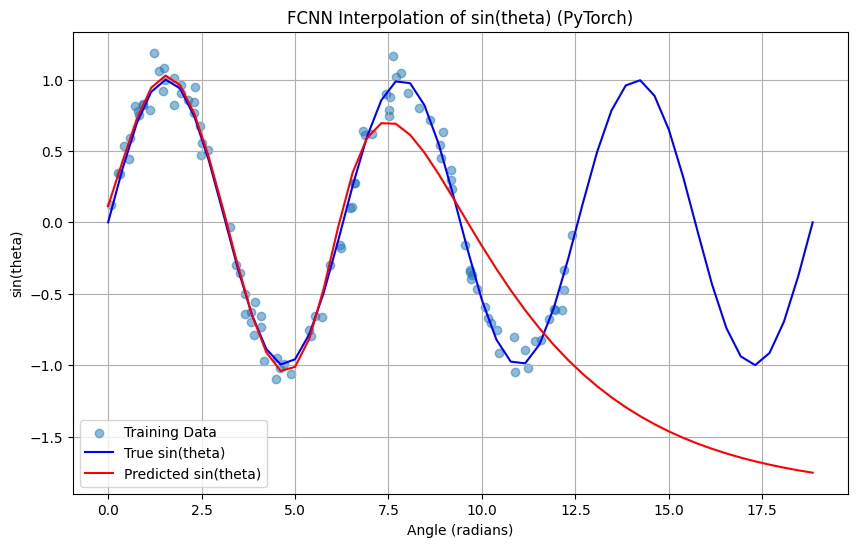

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim


# 1. Generate Training Data
np.random.seed(42)
num_samples = 100
angles_train_np = np.random.uniform(0, 4 * np.pi, num_samples).reshape(-1, 1).astype(np.float32)
sin_values_train_np = np.sin(angles_train_np).astype(np.float32)

# Add some noise to the training data (optional)
noise = np.random.normal(0, 0.1, sin_values_train_np.shape).astype(np.float32)
sin_values_train_np += noise

# Convert NumPy arrays to PyTorch tensors
angles_train = torch.tensor(angles_train_np)
sin_values_train = torch.tensor(sin_values_train_np)

# 2. Define the FCNN Model using PyTorch
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.tanh3 = nn.Tanh()
        self.fc_out = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.tanh1(self.fc1(x))
        x = self.tanh2(self.fc2(x))
        x = self.tanh3(self.fc3(x))
        x = self.fc_out(x)
        return x

# Instantiate the model
input_size = 1
hidden_size = 10
output_size = 1
model = Net(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-8)

# Train the model
num_epochs = 1000  # Reduzi o número de épocas
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(angles_train)
    loss = criterion(outputs, sin_values_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')

# 3. Generate Test Data for Evaluation
num_test_samples = 50
angles_test_np = np.linspace(0, 6 * np.pi, num_test_samples).reshape(-1, 1).astype(np.float32)
sin_values_true_np = np.sin(angles_test_np).astype(np.float32)

# Convert NumPy arrays to PyTorch tensors
angles_test = torch.tensor(angles_test_np)
sin_values_true = torch.tensor(sin_values_true_np)

# 4. Make Predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    sin_values_predicted = model(angles_test)

# 5. Evaluate the Model using PyTorch
criterion_eval = nn.MSELoss()
mse_tensor = criterion_eval(sin_values_predicted, sin_values_true)
mse = mse_tensor.item()
print(f"Mean Squared Error on Test Data (PyTorch): {mse}")

# 6. Visualize the Results
plt.figure(figsize=(10, 6))
plt.scatter(angles_train_np, sin_values_train_np, label='Training Data', alpha=0.5)
plt.plot(angles_test_np, sin_values_true_np, label='True sin(theta)', color='blue')
plt.plot(angles_test_np, sin_values_predicted.numpy(), label='Predicted sin(theta)', color='red')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(theta)')
plt.title('FCNN Interpolation of sin(theta) (PyTorch)')
plt.legend()
plt.grid(True)
plt.show()